In [2]:
import parquet
import json
import pandas as pd
import numpy as np

with open("data/boston,_ma_ttfb_rfailures.parquet",'rb') as fo:
	data0=pd.read_parquet(fo,engine="fastparquet")
data0.fillna(9999,inplace=True)
delay=data0.groupby('cdn')['ttfb_ms'].apply(list).to_dict()
timestamp=data0.groupby('cdn')['start_time_ms'].apply(list).to_dict()
# timestamp
data0

,location,cdn,start_time_ms,successful,ttfb_ms
0,"Boston, MA",xCD,1655535676671,1,208.0
1,"Boston, MA",Akamai,1655535676671,1,229.0
2,"Boston, MA",Limelight,1655535676671,1,208.0
3,"Boston, MA",Fastly,1655535676671,1,242.0
4,"Boston, MA",xCD,1655535680671,1,213.0
...,...,...,...,...,...
103807,"Boston, MA",Fastly,1655745717651,1,245.0
103808,"Boston, MA",xCD,1655745721650,1,208.0
103809,"Boston, MA",Akamai,1655745721650,1,237.0
103810,"Boston, MA",Limelight,1655745721650,1,208.0


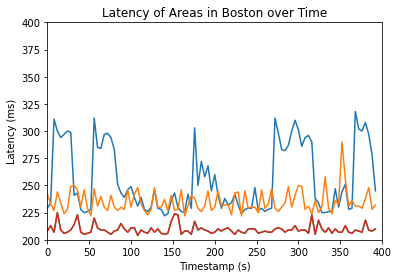

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as anime
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import random
city_num=len(delay.keys())
fig=plt.figure()

cfg_list=[]
data_pair_list=[]
cmap = plt.get_cmap('tab10')
it=0
for city, late in delay.items():
	color=cmap(it)
	cfg,=plt.plot([],[],color=color)
	cfg_list.append(cfg)
	time=timestamp[city]
	time=list((np.array(time)-time[0])/1000)
	# plt.plot(time,late)
	data_pair_list.append((time,late))
	it+=1

plt.xlim(0, data_pair_list[0][0][100])
plt.ylim(200, 400)
plt.title("Latency of Areas in Boston over Time")
plt.xlabel('Timestamp (s)')
plt.ylabel('Latency (ms)')
# metadata = dict(title="Movie", artist="sourabh")
writer = anime.PillowWriter(fps=50)
with writer.saving(fig, "data_trace.gif", 100):
	for i in range(len(cfg_list)):
		# print(data_pair_list[i][0][100])
		for j in range(0,100):
			cfg_list[i].set_data(data_pair_list[i][0][:j],data_pair_list[i][1][:j])
			writer.grab_frame()
